In [1]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Data

df = pd.read_csv('nm-covid19.csv',parse_dates=['Date'],index_col=['Date'])

In [3]:
df.fillna(0)
df.tail(2)

,Confirmed Cases,Active Cases,New Cases,Recoveries,Deaths
Date,,,,,
2020-04-18,1798,1280,87.0,465,53
2020-04-19,1845,1303,47.0,487,55


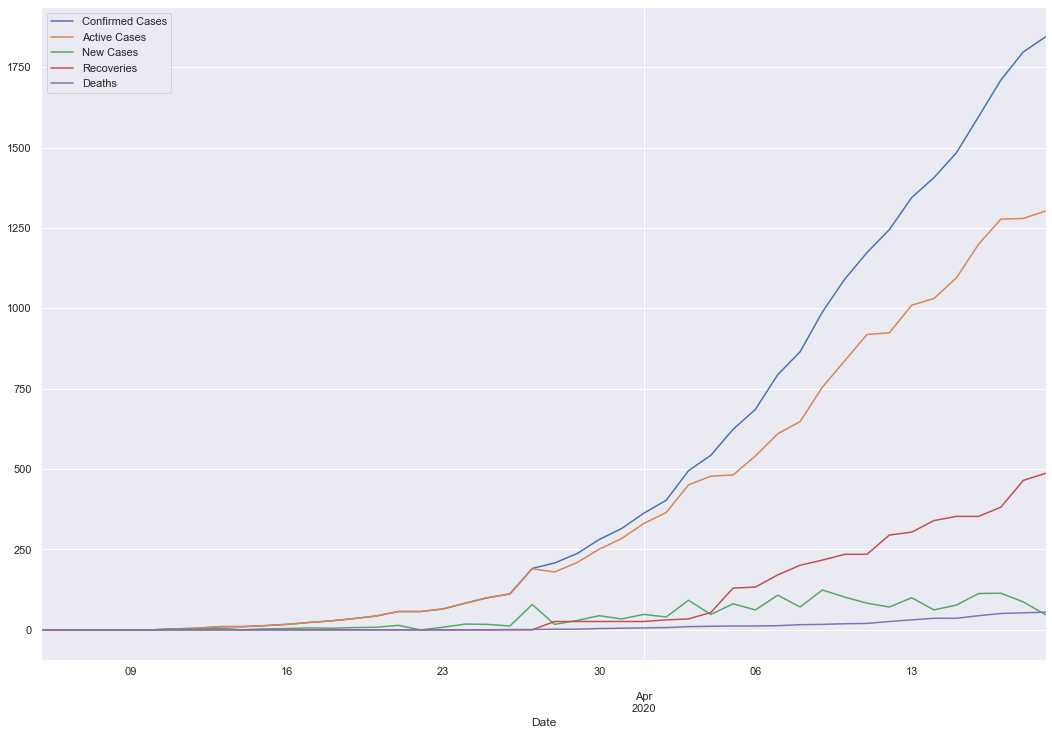

In [4]:
sns.set(style="darkgrid")
df.plot(figsize=(18,12))